# Verileri Okuma

In [1]:
# Kütüphaneleri import ettik
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Verilerin Okunması
egitim_verisi=pd.read_csv("train.csv")
test_verisi=pd.read_csv("test_x.csv")

In [3]:
# Analizlerimizi bozacak ve Overfitting'e yol açacak index sütunun atılması
egitim_verisi = egitim_verisi.drop(['index'], axis=1)
test_verisi = test_verisi.drop(['index'], axis=1)

# Veri Görselleştirme

### Verinin Özeti

In [4]:
egitim_verisi.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [5]:
print('Verilen veri setinin şekli {}. {} satır ve {} sütun içeriyor.'.format(egitim_verisi.shape, egitim_verisi.shape[0], egitim_verisi.shape[1]))

Verilen veri setinin şekli (5460, 13). 5460 satır ve 13 sütun içeriyor.


### Özellik İsimleri ve Veri Tipleri

In [6]:
egitim_verisi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Cinsiyet                                    5460 non-null   object 
 1   Yaş Grubu                                   5460 non-null   object 
 2   Medeni Durum                                5460 non-null   object 
 3   Eğitim Düzeyi                               5460 non-null   object 
 4   İstihdam Durumu                             5460 non-null   object 
 5   Yıllık Ortalama Gelir                       5460 non-null   float64
 6   Yaşadığı Şehir                              5460 non-null   object 
 7   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 8   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 9   Yıllık Ortalama Sipariş Verilen Ürün Adedi  5460 non-null   float64
 10  Eğitime Deva

### Verileri Bölme

##### Nümerik ve Kategorik verileri farklı değişkenlerde saklayalım

In [7]:
# Nümerik verileri seçme
numerical_data = egitim_verisi.select_dtypes(include='number')

# Özellikleri listeye ekleme
numerical_features = numerical_data.columns.tolist()

print(f'{len(numerical_features)} tane nümerik özellik var:', '\n')
print(numerical_features)

4 tane nümerik özellik var: 

['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']


In [8]:
# Kategorik verileri seçme
categorical_data = egitim_verisi.select_dtypes(include= 'object')

# Özellikleri listeye ekleme
categorical_features=categorical_data.columns.tolist()

print(f'{len(categorical_features)} tane kategorik özellik var:', '\n')
print(categorical_features)

9 tane kategorik özellik var: 

['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu', 'Öbek İsmi']


### Descriptive Analysis

##### Descriptive analizde, özellik hakkında çıkarımda bulunmak için her değişkeni ayrı ayrı analiz ederiz.

In [9]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Yıllık Ortalama Gelir,5460.0,363571.133428,219714.442407,43922.988693,215693.439307,286925.436073,468188.221798,1.192437e+06
Yıllık Ortalama Satın Alım Miktarı,5460.0,16616.612217,14099.171704,2859.254000,4931.859057,8426.818967,30579.244695,4.860559e+04
Yıllık Ortalama Sipariş Verilen Ürün Adedi,5460.0,24.040884,14.945655,0.000000,11.550502,20.095924,35.918161,6.461620e+01
Yıllık Ortalama Sepete Atılan Ürün Adedi,5460.0,73.445693,47.214184,3.977559,25.009168,82.485579,104.473291,2.423084e+02


Yukarıdaki tabloda nümerik özellikler için toplam sayı, ortalama, standart sapma, özelliğin min-max değerleri gibi çıkarımları görebiliriz

In [10]:
categorical_data.describe(include='object').T

,count,unique,top,freq
Cinsiyet,5460,2,Erkek,2964
Yaş Grubu,5460,5,18-30,1841
Medeni Durum,5460,2,Evli,2834
Eğitim Düzeyi,5460,9,Lise Mezunu,1388
İstihdam Durumu,5460,4,Düzenli ve Ücretli Bir İşi Var,2768
Yaşadığı Şehir,5460,4,Büyük Şehir,1959
En Çok İlgilendiği Ürün Grubu,5460,5,Giyim,1487
Eğitime Devam Etme Durumu,5460,2,Etmiyor,4554
Öbek İsmi,5460,8,obek_4,720


Yukarıdaki tabloda kategorik özellikler için toplam sayı, çeşidi gibi çıkarımları görebiliriz

### Nümerik değerlerin Varyans ve Skew Değerleri

In [11]:
# Nümerik verilerin varyans değerleri
numerical_data.var()

Yıllık Ortalama Gelir                         4.827444e+10
Yıllık Ortalama Satın Alım Miktarı            1.987866e+08
Yıllık Ortalama Sipariş Verilen Ürün Adedi    2.233726e+02
Yıllık Ortalama Sepete Atılan Ürün Adedi      2.229179e+03
dtype: float64

In [12]:
# Nümerik verilerin skew değerleri
numerical_data.skew()

Yıllık Ortalama Gelir                         1.561444
Yıllık Ortalama Satın Alım Miktarı            0.654323
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0.540988
Yıllık Ortalama Sepete Atılan Ürün Adedi      0.375989
dtype: float64

In [13]:
# Nümerik değerlerin varyans değerlerine bakmadan önce normalize etmemiz lazım
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

normalized_numerical = scaler.fit_transform(egitim_verisi[numerical_features])

normalized_df = pd.DataFrame(normalized_numerical, columns=numerical_features)

In [14]:
normalized_df.var()

Yıllık Ortalama Gelir                         0.036597
Yıllık Ortalama Satın Alım Miktarı            0.094989
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0.053499
Yıllık Ortalama Sepete Atılan Ürün Adedi      0.039245
dtype: float64

In [15]:
normalized_df.skew()

Yıllık Ortalama Gelir                         1.561444
Yıllık Ortalama Satın Alım Miktarı            0.654323
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0.540988
Yıllık Ortalama Sepete Atılan Ürün Adedi      0.375989
dtype: float64

### Gözlem

- Ortalama gelirin skew değeri diğerlerine göre daha büyük
- Diğerleri normal değerlere sahip

### Histogramlar
##### Özelliklerin dağılımlarını ve aykırı verileri görmek için histogram kullanabiliriz

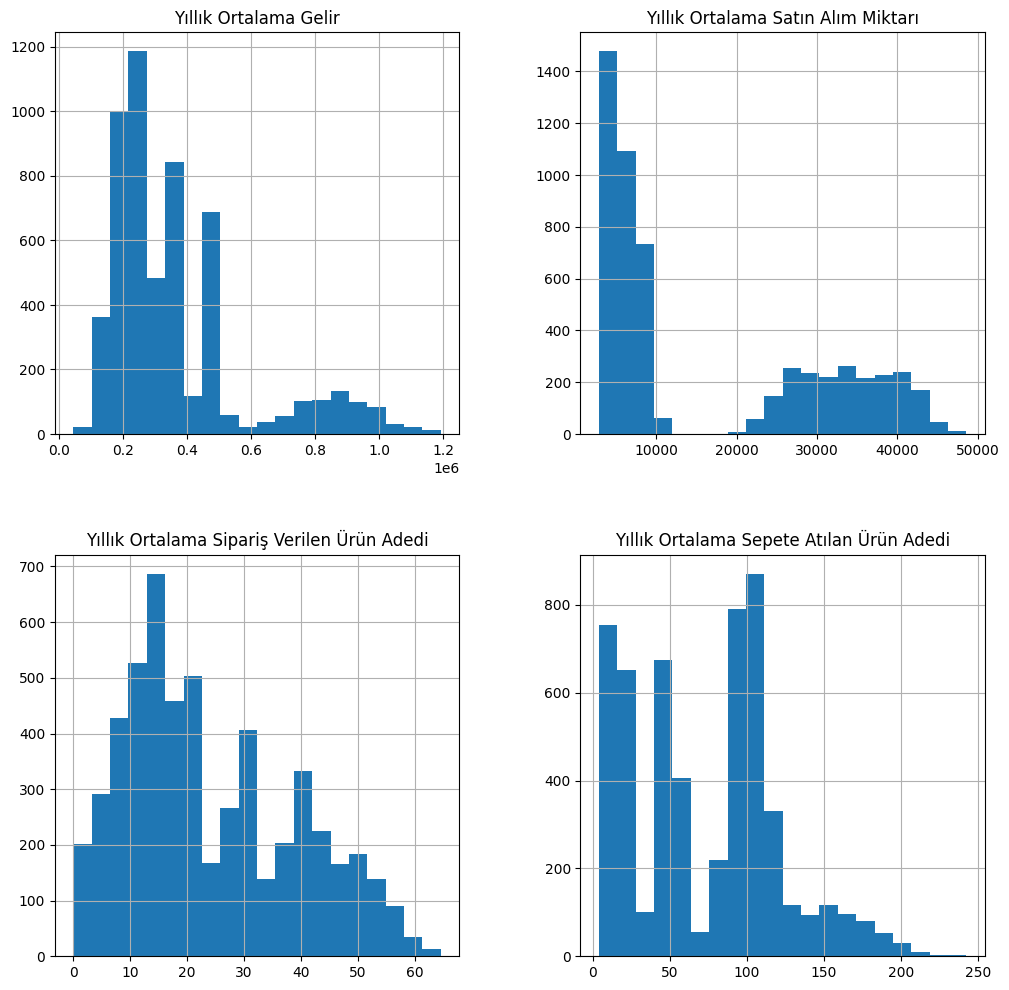

In [16]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

### Nümerik özelliklerdeki eşsiz değerlerin sayısı

In [17]:
numerical_data.nunique()

Yıllık Ortalama Gelir                         5460
Yıllık Ortalama Satın Alım Miktarı            5460
Yıllık Ortalama Sipariş Verilen Ürün Adedi    5422
Yıllık Ortalama Sepete Atılan Ürün Adedi      5460
dtype: int64

### Nümerik özelliklerdeki eksik veriler

In [18]:
numerical_data.isnull().sum()

Yıllık Ortalama Gelir                         0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

### Gözlem

- Eksik verimiz olmadığı için eksik verileri nasıl dolduracağımız bir problem değil

### Kategorik özelliklerdeki eşşiz veriler 

In [19]:
unique_counts = categorical_data.nunique()

for index, i in enumerate(range(7), start=1):
    classes = categorical_data[categorical_features[i]].unique()  # Sınıfları al
    num_classes = len(classes)  # Sınıf sayısını al
    class_list = ", ".join(classes)  # Sınıfları virgülle ayrılmış bir liste olarak oluştur
    print(index, "-) {a}, {b} tane eşsiz veriye sahip: {c}".format(a=categorical_features[i], b=num_classes, c=class_list))


1 -) Cinsiyet, 2 tane eşsiz veriye sahip: Kadın, Erkek
2 -) Yaş Grubu, 5 tane eşsiz veriye sahip: 31-40, >60, 18-30, 51-60, 41-50
3 -) Medeni Durum, 2 tane eşsiz veriye sahip: Bekar, Evli
4 -) Eğitim Düzeyi, 9 tane eşsiz veriye sahip: Yüksek Lisans Mezunu, Lise Mezunu, Ortaokul Mezunu, Yüksekokul Mezunu, Üniversite Mezunu, Doktora Mezunu, İlkokul Mezunu, Doktora Ötesi, Eğitimsiz
5 -) İstihdam Durumu, 4 tane eşsiz veriye sahip: Düzenli ve Ücretli Bir İşi Var, Kendi İşinin Sahibi, İşsiz veya Düzenli Bir İşi Yok, Emekli
6 -) Yaşadığı Şehir, 4 tane eşsiz veriye sahip: Büyük Şehir, Küçük Şehir, Kırsal, Köy veya Kasaba
7 -) En Çok İlgilendiği Ürün Grubu, 5 tane eşsiz veriye sahip: Elektronik ve Teknolojik Ürünler, Spor Malzemeleri, Giyim, Ev ve Mobilya, Kozmetik


### Kategorik veriler için bar grafiği


Cinsiyet



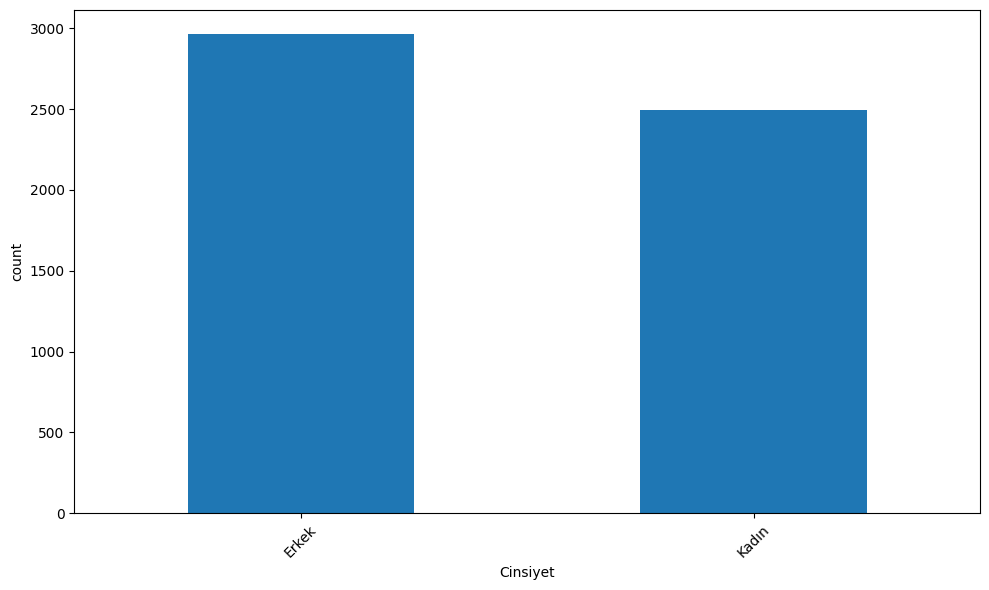


Yaş Grubu



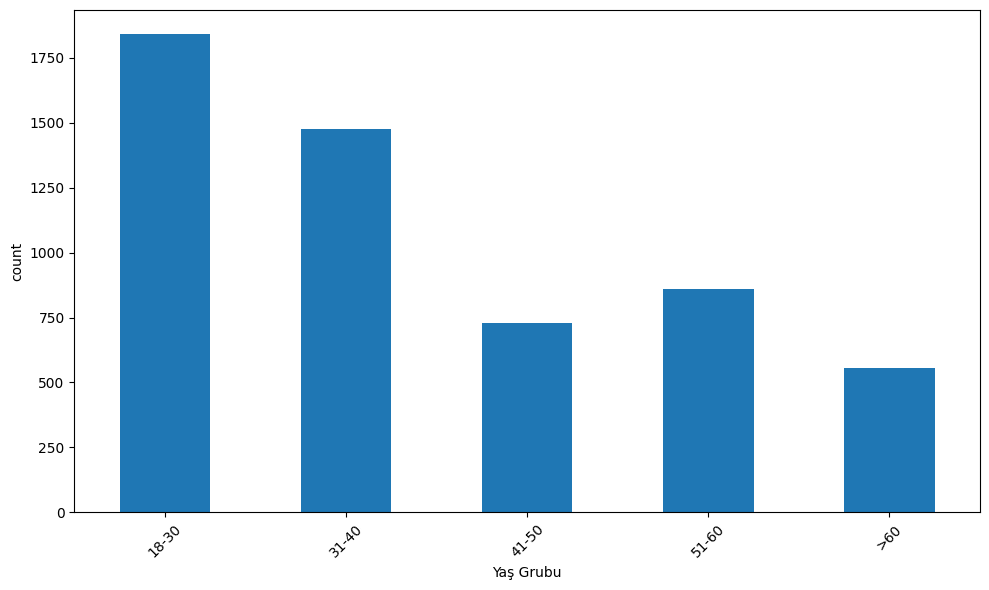


Medeni Durum



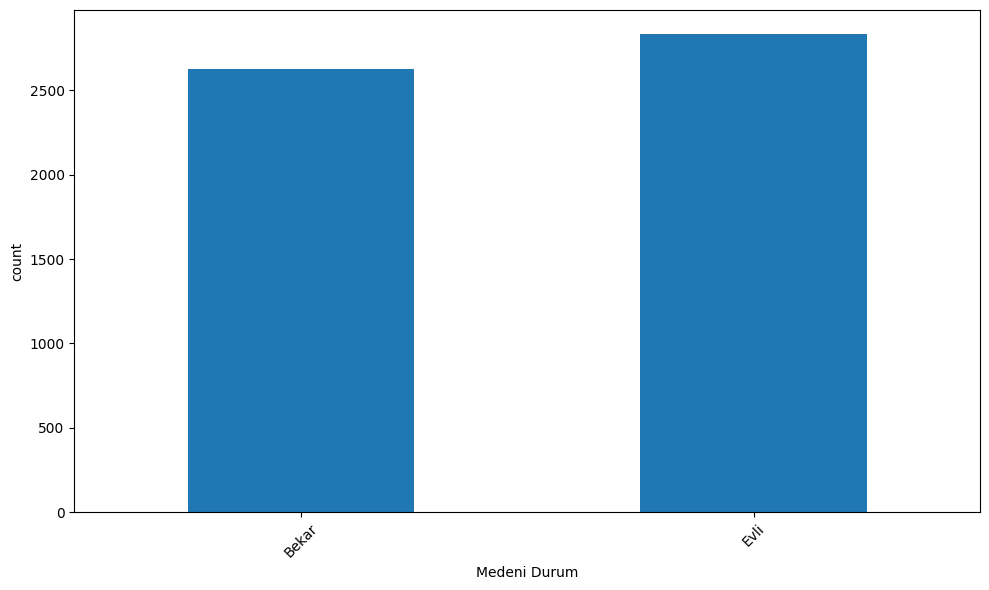


Eğitim Düzeyi



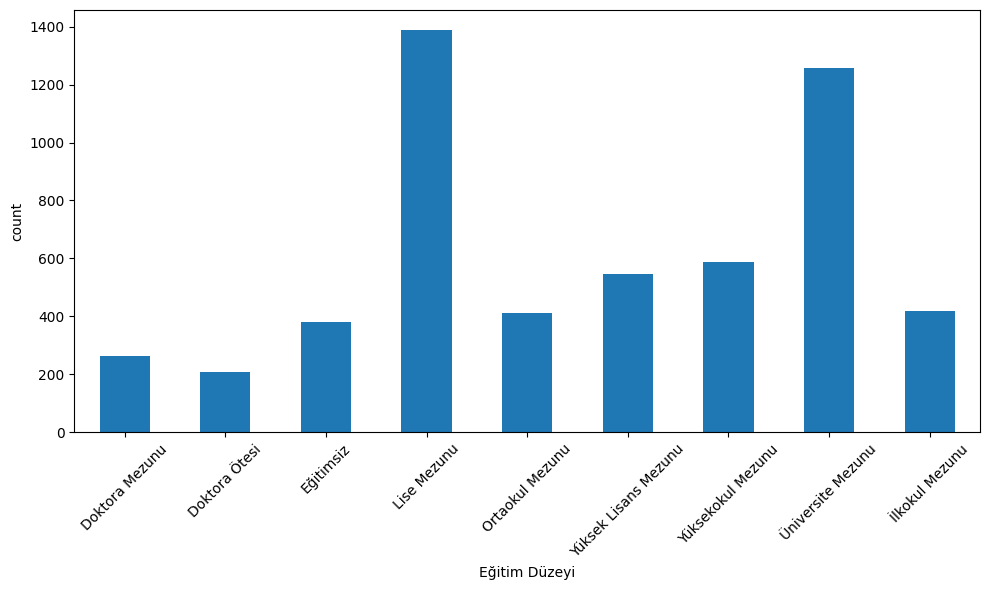


İstihdam Durumu



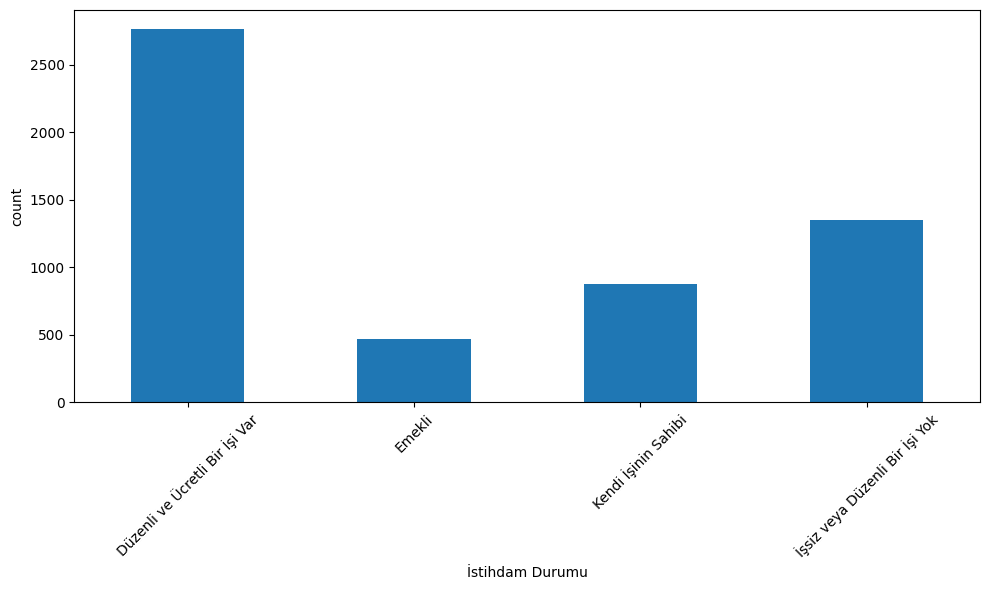


Yaşadığı Şehir



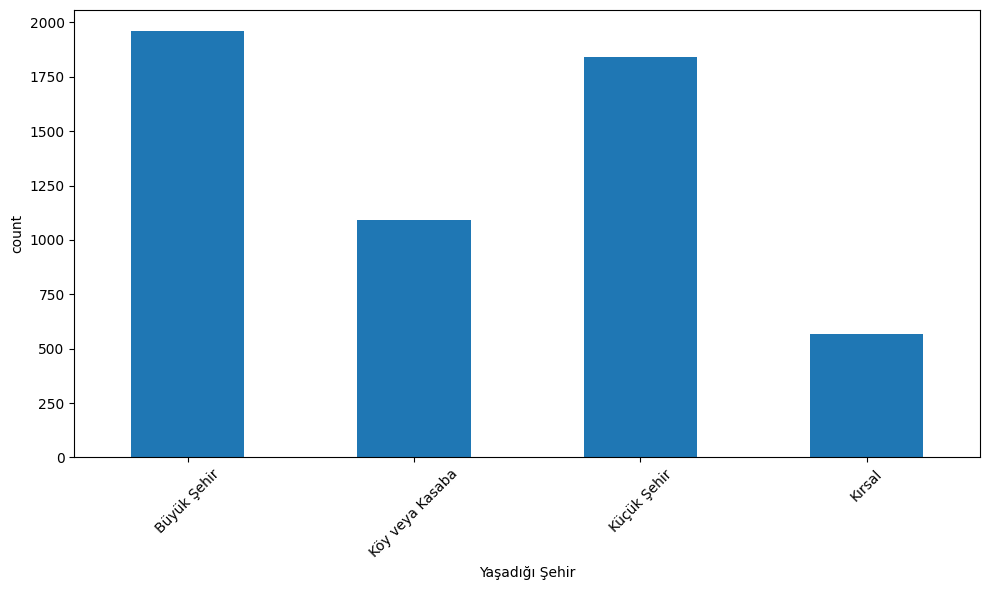


En Çok İlgilendiği Ürün Grubu



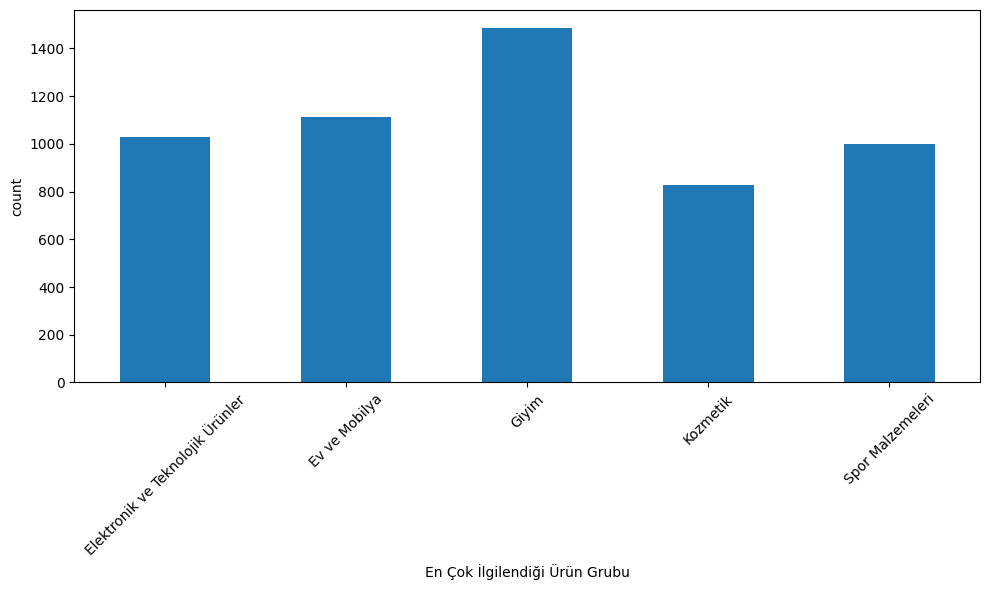


Eğitime Devam Etme Durumu



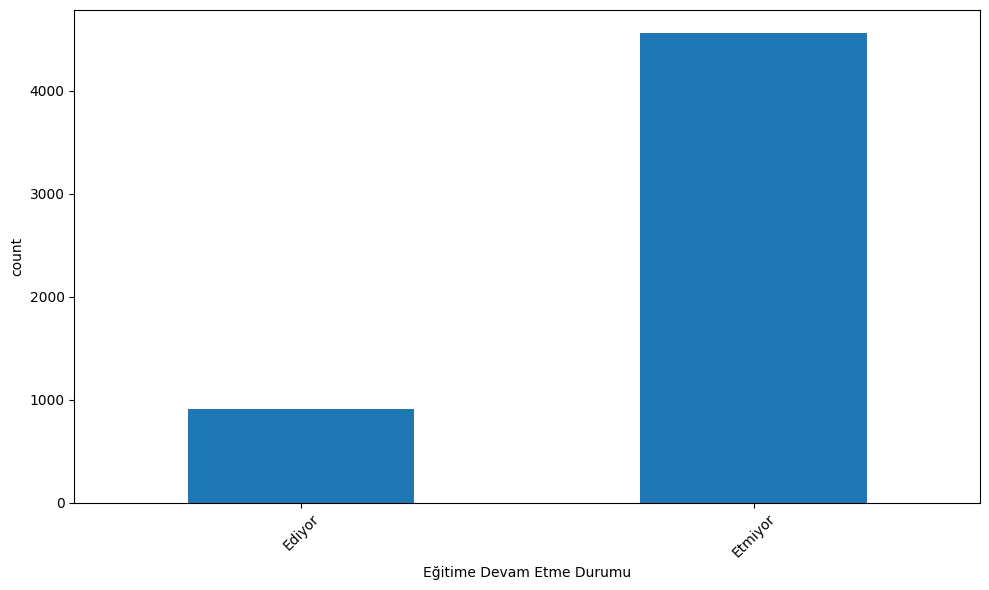


Öbek İsmi



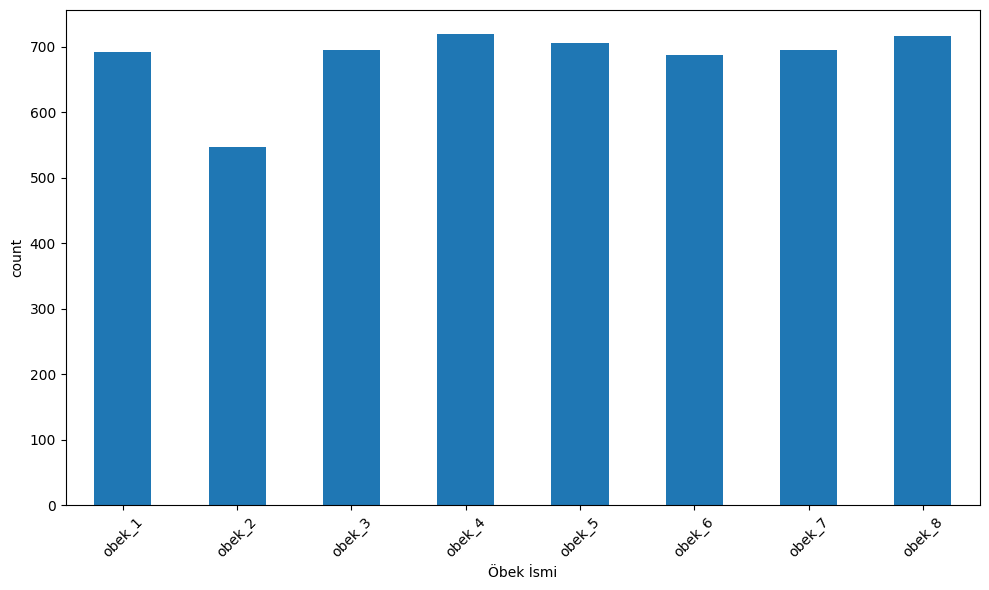

In [20]:
for col in categorical_features:
    print()
    print(f"\033[1m{col}\033[0m\n")
    
    plt.figure(figsize=(10, 6))  # Genişlik ve yükseklik ayarla
    
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col, ylabel='count')
    
    plt.xticks(rotation=45)  # Etiketleri 45 derece döndür
    plt.tight_layout()  # Otomatik olarak yerleşimi düzenle
    
    plt.show()

### Gözlem

- Erkek-Kadın oranı yakın
- Genç insanların oranı yaşlı insanlardan daha fazla
- Bekar-Evli oranı yakın
- Çoğu insan lise ve lisans mezunu
- Çoğu insanın düzenli bir işi ve geliri var
- İnsanlar genellikle büyük veya küçük şehirlerden
- Ürünler çoğunlukta aynı oranda alınmış ama giyim daha çok alınmış
- İnsanların çoğu eğitimini bitirmiş
- Öbeklerin dağılımı eşit

### Korelasyon Analizi
##### Nümerik verilerin korelasyonuna bakalım(Kategorik veriler dönüştürüldüğünde tamamına bakabiliriz)

In [21]:
pd.set_option("display.max_rows", 10)  # Görüntülenecek maksimum satır sayısı
correlation=numerical_data.corr(method='pearson')
correlation

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
Yıllık Ortalama Gelir,1.000000,0.740238,0.444398,0.145425
Yıllık Ortalama Satın Alım Miktarı,0.740238,1.000000,0.418499,0.133864
Yıllık Ortalama Sipariş Verilen Ürün Adedi,0.444398,0.418499,1.000000,0.659455
Yıllık Ortalama Sepete Atılan Ürün Adedi,0.145425,0.133864,0.659455,1.000000


### Korelasyon ısı haritası grafiği

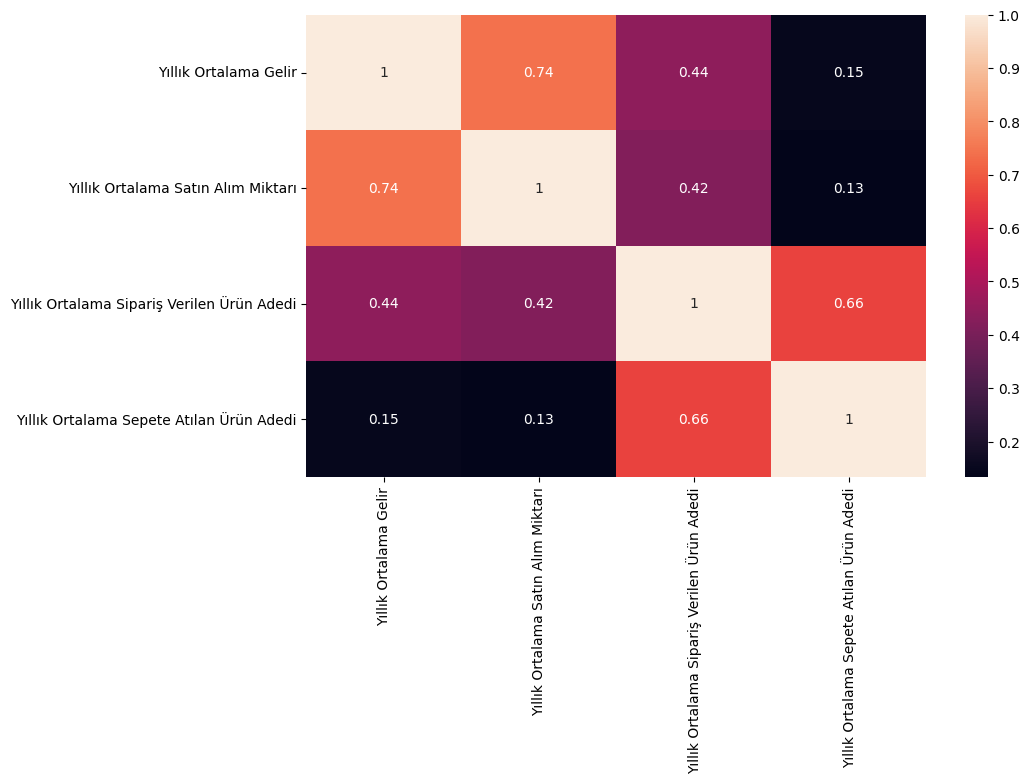

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), ax=ax, annot=True)
plt.show()

### Gözlem

- Satın alım miktarı ve gelir arasında yüksek bir ilişki var, bu yorum mantık kullanılarak da yapılabilir
- Sepete atılan ürün ve sipariş verilen ürün arasında da yüksek bir ilişki var, bu yorum da mantık kullanılarak yapılabilir fakat anlıyoruz ki bazı insanlar alışveriş sitesinde gezmeyi seviyor veya indirim kovalıyor, yani sepete koyulan her ürün alınmıyor

### Verisetinde dengesizliğe göz atalım

In [23]:
class_counts = egitim_verisi.groupby("Öbek İsmi").size()

columns = ['outcome', 'count', 'percentage']
outcome = egitim_verisi["Öbek İsmi"].unique()
count = []
percentage = []

total_samples = egitim_verisi.shape[0]

for val in outcome:
    count.append(class_counts[val])
    percent = (class_counts[val] / total_samples) * 100
    percentage.append(percent)

# Convert the calculated values into a dataframe
imbalance_df = pd.DataFrame(list(zip(outcome, count, percentage)), columns=columns)
imbalance_df

,outcome,count,percentage
0,obek_4,720,13.186813
1,obek_5,706,12.930403
2,obek_8,717,13.131868
3,obek_3,695,12.728938
4,obek_6,688,12.600733
5,obek_1,692,12.673993
6,obek_7,695,12.728938
7,obek_2,547,10.018315


### Bar grafiği

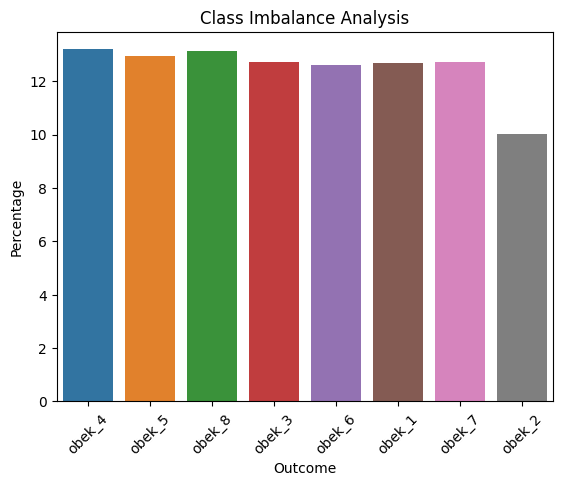

In [24]:
sns.barplot(data=imbalance_df, x='outcome', y='percentage')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Class Imbalance Analysis')
plt.xticks(rotation=45)  # Eğer etiketlerin dönmesini isterseniz
plt.show()

### Gözlem

- Hedef verimiz ayrık dağılıma sahip değil

### Sayısal Verilerdeki Yoğunluk Grafikleri

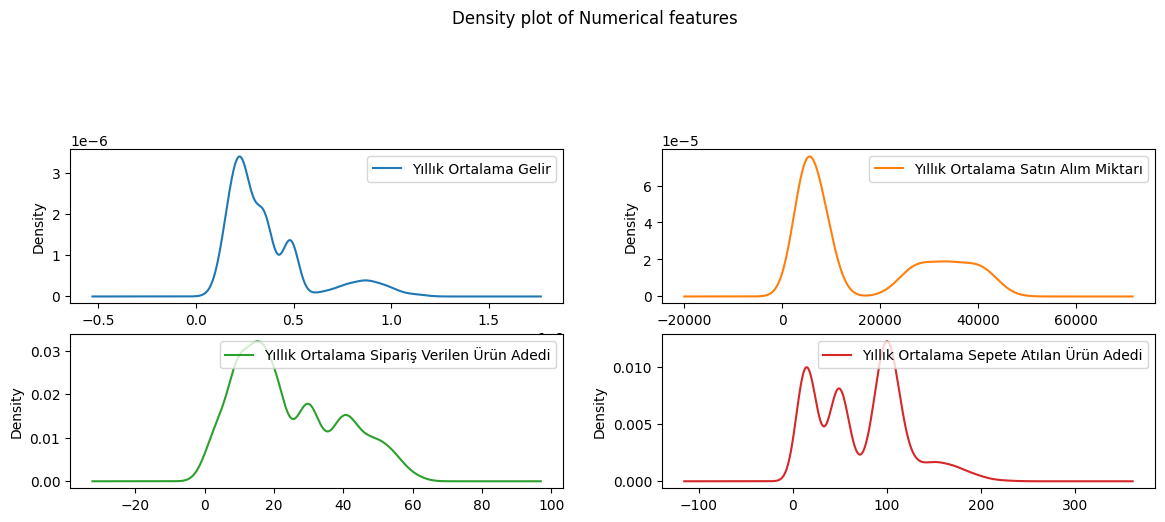

In [25]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

# Veri Önişleme

In [27]:
# Manuel :) Encoding işlemi, Train verisi için
egitim_verisi["Cinsiyet"] = egitim_verisi["Cinsiyet"].replace(["Erkek"], 1)
egitim_verisi["Cinsiyet"] = egitim_verisi["Cinsiyet"].replace(["Kadın"], 0)

egitim_verisi["Medeni Durum"] = egitim_verisi["Medeni Durum"].replace(["Evli"], 1)
egitim_verisi["Medeni Durum"] = egitim_verisi["Medeni Durum"].replace(["Bekar"], 0)

egitim_verisi["Eğitime Devam Etme Durumu"] = egitim_verisi["Eğitime Devam Etme Durumu"].replace(["Ediyor"], 1)
egitim_verisi["Eğitime Devam Etme Durumu"] = egitim_verisi["Eğitime Devam Etme Durumu"].replace(["Etmiyor"], 0)

egitim_verisi["Yaş Grubu"] = egitim_verisi["Yaş Grubu"].replace(["18-30"], 0)
egitim_verisi["Yaş Grubu"] = egitim_verisi["Yaş Grubu"].replace(["31-40"], 1)
egitim_verisi["Yaş Grubu"] = egitim_verisi["Yaş Grubu"].replace(["41-50"], 2)
egitim_verisi["Yaş Grubu"] = egitim_verisi["Yaş Grubu"].replace(["51-60"], 3)
egitim_verisi["Yaş Grubu"] = egitim_verisi["Yaş Grubu"].replace([">60"], 4)

egitim_verisi["Eğitim Düzeyi"] = egitim_verisi["Eğitim Düzeyi"].replace(["Eğitimsiz"], 0)
egitim_verisi["Eğitim Düzeyi"] = egitim_verisi["Eğitim Düzeyi"].replace(["İlkokul Mezunu"], 1)
egitim_verisi["Eğitim Düzeyi"] = egitim_verisi["Eğitim Düzeyi"].replace(["Ortaokul Mezunu"], 2)
egitim_verisi["Eğitim Düzeyi"] = egitim_verisi["Eğitim Düzeyi"].replace(["Lise Mezunu"], 3)
egitim_verisi["Eğitim Düzeyi"] = egitim_verisi["Eğitim Düzeyi"].replace(["Yüksekokul Mezunu"], 4)
egitim_verisi["Eğitim Düzeyi"] = egitim_verisi["Eğitim Düzeyi"].replace(["Üniversite Mezunu"], 5)
egitim_verisi["Eğitim Düzeyi"] = egitim_verisi["Eğitim Düzeyi"].replace(["Yüksek Lisans Mezunu"], 6)
egitim_verisi["Eğitim Düzeyi"] = egitim_verisi["Eğitim Düzeyi"].replace(["Doktora Mezunu"], 7)
egitim_verisi["Eğitim Düzeyi"] = egitim_verisi["Eğitim Düzeyi"].replace(["Doktora Ötesi"], 8)

egitim_verisi["Yaşadığı Şehir"] = egitim_verisi["Yaşadığı Şehir"].replace(["Kırsal"], 0)
egitim_verisi["Yaşadığı Şehir"] = egitim_verisi["Yaşadığı Şehir"].replace(["Köy veya Kasaba"], 1)
egitim_verisi["Yaşadığı Şehir"] = egitim_verisi["Yaşadığı Şehir"].replace(["Küçük Şehir"], 2)
egitim_verisi["Yaşadığı Şehir"] = egitim_verisi["Yaşadığı Şehir"].replace(["Büyük Şehir"], 3)

egitim_verisi = pd.get_dummies(egitim_verisi, columns=['İstihdam Durumu', 'En Çok İlgilendiği Ürün Grubu'])

In [28]:
# Encoding işlemi, Test verisi için
test_verisi["Cinsiyet"] = test_verisi["Cinsiyet"].replace(["Erkek"], 1)
test_verisi["Cinsiyet"] = test_verisi["Cinsiyet"].replace(["Kadın"], 0)

test_verisi["Medeni Durum"] = test_verisi["Medeni Durum"].replace(["Evli"], 1)
test_verisi["Medeni Durum"] = test_verisi["Medeni Durum"].replace(["Bekar"], 0)

test_verisi["Eğitime Devam Etme Durumu"] = test_verisi["Eğitime Devam Etme Durumu"].replace(["Ediyor"], 1)
test_verisi["Eğitime Devam Etme Durumu"] = test_verisi["Eğitime Devam Etme Durumu"].replace(["Etmiyor"], 0)

test_verisi["Yaş Grubu"] = test_verisi["Yaş Grubu"].replace(["18-30"], 0)
test_verisi["Yaş Grubu"] = test_verisi["Yaş Grubu"].replace(["31-40"], 1)
test_verisi["Yaş Grubu"] = test_verisi["Yaş Grubu"].replace(["41-50"], 2)
test_verisi["Yaş Grubu"] = test_verisi["Yaş Grubu"].replace(["51-60"], 3)
test_verisi["Yaş Grubu"] = test_verisi["Yaş Grubu"].replace([">60"], 4)

test_verisi["Eğitim Düzeyi"] = test_verisi["Eğitim Düzeyi"].replace(["Eğitimsiz"], 0)
test_verisi["Eğitim Düzeyi"] = test_verisi["Eğitim Düzeyi"].replace(["İlkokul Mezunu"], 1)
test_verisi["Eğitim Düzeyi"] = test_verisi["Eğitim Düzeyi"].replace(["Ortaokul Mezunu"], 2)
test_verisi["Eğitim Düzeyi"] = test_verisi["Eğitim Düzeyi"].replace(["Lise Mezunu"], 3)
test_verisi["Eğitim Düzeyi"] = test_verisi["Eğitim Düzeyi"].replace(["Yüksekokul Mezunu"], 4)
test_verisi["Eğitim Düzeyi"] = test_verisi["Eğitim Düzeyi"].replace(["Üniversite Mezunu"], 5)
test_verisi["Eğitim Düzeyi"] = test_verisi["Eğitim Düzeyi"].replace(["Yüksek Lisans Mezunu"], 6)
test_verisi["Eğitim Düzeyi"] = test_verisi["Eğitim Düzeyi"].replace(["Doktora Mezunu"], 7)
test_verisi["Eğitim Düzeyi"] = test_verisi["Eğitim Düzeyi"].replace(["Doktora Ötesi"], 8)

test_verisi["Yaşadığı Şehir"] = test_verisi["Yaşadığı Şehir"].replace(["Kırsal"], 0)
test_verisi["Yaşadığı Şehir"] = test_verisi["Yaşadığı Şehir"].replace(["Köy veya Kasaba"], 1)
test_verisi["Yaşadığı Şehir"] = test_verisi["Yaşadığı Şehir"].replace(["Küçük Şehir"], 2)
test_verisi["Yaşadığı Şehir"] = test_verisi["Yaşadığı Şehir"].replace(["Büyük Şehir"], 3)

test_verisi = pd.get_dummies(test_verisi, columns=['İstihdam Durumu', 'En Çok İlgilendiği Ürün Grubu'])

In [31]:
# Eğitim için bağımsız değişkenlerin ve bağımlı değişkenin oluşturulması
x_train = egitim_verisi.drop(['Öbek İsmi'], axis=1)
y_train = egitim_verisi['Öbek İsmi']

### Tüm veriler için korelasyon
##### Bu işlemi yapmak için bağımsız değişkenlerimizi zaten dönüştürmüştük, hedef değişkenimizi de dönüştürelim

In [32]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluştur
label_encoder = LabelEncoder()

# 'Öbek İsmi' sütununu label encoding işleminden geçir
egitim_verisi_corr = egitim_verisi.copy()  # Veriyi korumak için kopyasını al
egitim_verisi_corr['Öbek İsmi Encoded'] = label_encoder.fit_transform(egitim_verisi_corr['Öbek İsmi'])

# Oluşturulan yeni değişkeni göster
print(egitim_verisi_corr[['Öbek İsmi', 'Öbek İsmi Encoded']].head())

  Öbek İsmi  Öbek İsmi Encoded
0    obek_4                  3
1    obek_5                  4
2    obek_8                  7
3    obek_3                  2
4    obek_3                  2


In [33]:
egitim_verisi_corr = egitim_verisi_corr.drop(columns=['Öbek İsmi'])

In [34]:
egitim_verisi_corr = egitim_verisi_corr.rename(columns={'Öbek İsmi Encoded': 'Öbek İsmi'})
egitim_verisi_corr

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yaşadığı Şehir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Öbek İsmi
0,0,1,0,6,748266.440879,3,32010.900881,37.310644,0,102.936904,True,False,False,False,True,False,False,False,False,3
1,1,4,1,3,246298.609605,2,4145.729891,11.554851,0,82.176053,False,False,True,False,False,False,False,False,True,4
2,1,0,0,3,268582.732360,2,9924.379414,55.353236,1,141.661426,True,False,False,False,False,False,True,False,False,7
3,1,3,1,3,327721.837865,0,6417.780714,15.417239,0,17.097397,False,False,True,False,False,False,True,False,False,2
4,1,1,1,2,397431.626948,3,7886.663061,14.689837,0,20.470459,False,False,False,True,False,False,True,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,0,4,0,5,478054.247819,1,43182.299801,31.356284,0,51.600436,False,True,False,False,False,False,False,True,False,5
5456,1,3,1,8,481852.853651,1,42107.996193,26.288620,0,49.190536,False,False,True,False,False,True,False,False,False,5
5457,0,3,1,1,309443.687351,2,4655.392445,5.156906,0,9.537384,True,False,False,False,False,True,False,False,False,0
5458,0,0,0,4,266604.268016,3,9016.165906,39.205399,1,143.281718,True,False,False,False,False,True,False,False,False,7


In [35]:
correlation = egitim_verisi_corr.corr(method='pearson')
correlation

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yaşadığı Şehir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var,İstihdam Durumu_Emekli,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Öbek İsmi
Cinsiyet,1.000000,-0.006038,0.002607,0.007169,0.019209,0.034290,-0.057515,-0.116535,-0.020584,-0.027763,0.062780,0.001469,0.098864,-0.157965,0.231640,-0.098295,-0.113334,-0.215177,0.198203,0.060093
Yaş Grubu,-0.006038,1.000000,0.271417,-0.027734,-0.032910,-0.321744,0.206669,-0.283716,-0.335466,-0.484185,-0.136546,0.317069,0.045007,-0.085068,-0.023056,0.035452,0.033586,-0.055534,-0.000756,-0.201421
Medeni Durum,0.002607,0.271417,1.000000,-0.110356,-0.163971,-0.192029,-0.045034,-0.334808,-0.272206,-0.381513,-0.070918,0.106691,0.035664,-0.017164,0.000844,0.036185,0.041317,-0.069757,-0.021378,-0.228713
Eğitim Düzeyi,0.007169,-0.027734,-0.110356,1.000000,0.346011,0.078522,0.448109,0.314992,0.057453,0.287426,0.082154,0.115669,-0.041756,-0.134433,0.034251,0.006837,-0.108927,0.058204,0.029600,0.355823
Yıllık Ortalama Gelir,0.019209,-0.032910,-0.163971,0.346011,1.000000,0.199734,0.740238,0.444398,-0.139816,0.145425,0.001370,0.124007,-0.018967,-0.065600,0.007842,0.019089,-0.114072,0.066010,0.042211,0.086821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,-0.098295,0.035452,0.036185,0.006837,0.019089,-0.028825,0.076114,0.077676,0.012399,-0.002786,-0.024320,0.039654,-0.048650,0.044008,-0.243980,1.000000,-0.309738,-0.214209,-0.239881,0.045435
En Çok İlgilendiği Ürün Grubu_Giyim,-0.113334,0.033586,0.041317,-0.108927,-0.114072,-0.036428,-0.135154,-0.145991,-0.029576,-0.188462,-0.036084,-0.062509,-0.000437,0.082614,-0.294817,-0.309738,1.000000,-0.258843,-0.289864,-0.239029
En Çok İlgilendiği Ürün Grubu_Kozmetik,-0.215177,-0.055534,-0.069757,0.058204,0.066010,0.019435,0.082057,0.074318,0.048620,0.072724,0.050767,-0.008144,-0.042299,-0.017537,-0.203890,-0.214209,-0.258843,1.000000,-0.200465,0.048892
En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,0.198203,-0.000756,-0.021378,0.029600,0.042211,0.024464,0.009945,0.023349,-0.009033,0.067671,-0.004229,0.020256,0.055187,-0.055219,-0.228326,-0.239881,-0.289864,-0.200465,1.000000,0.082693


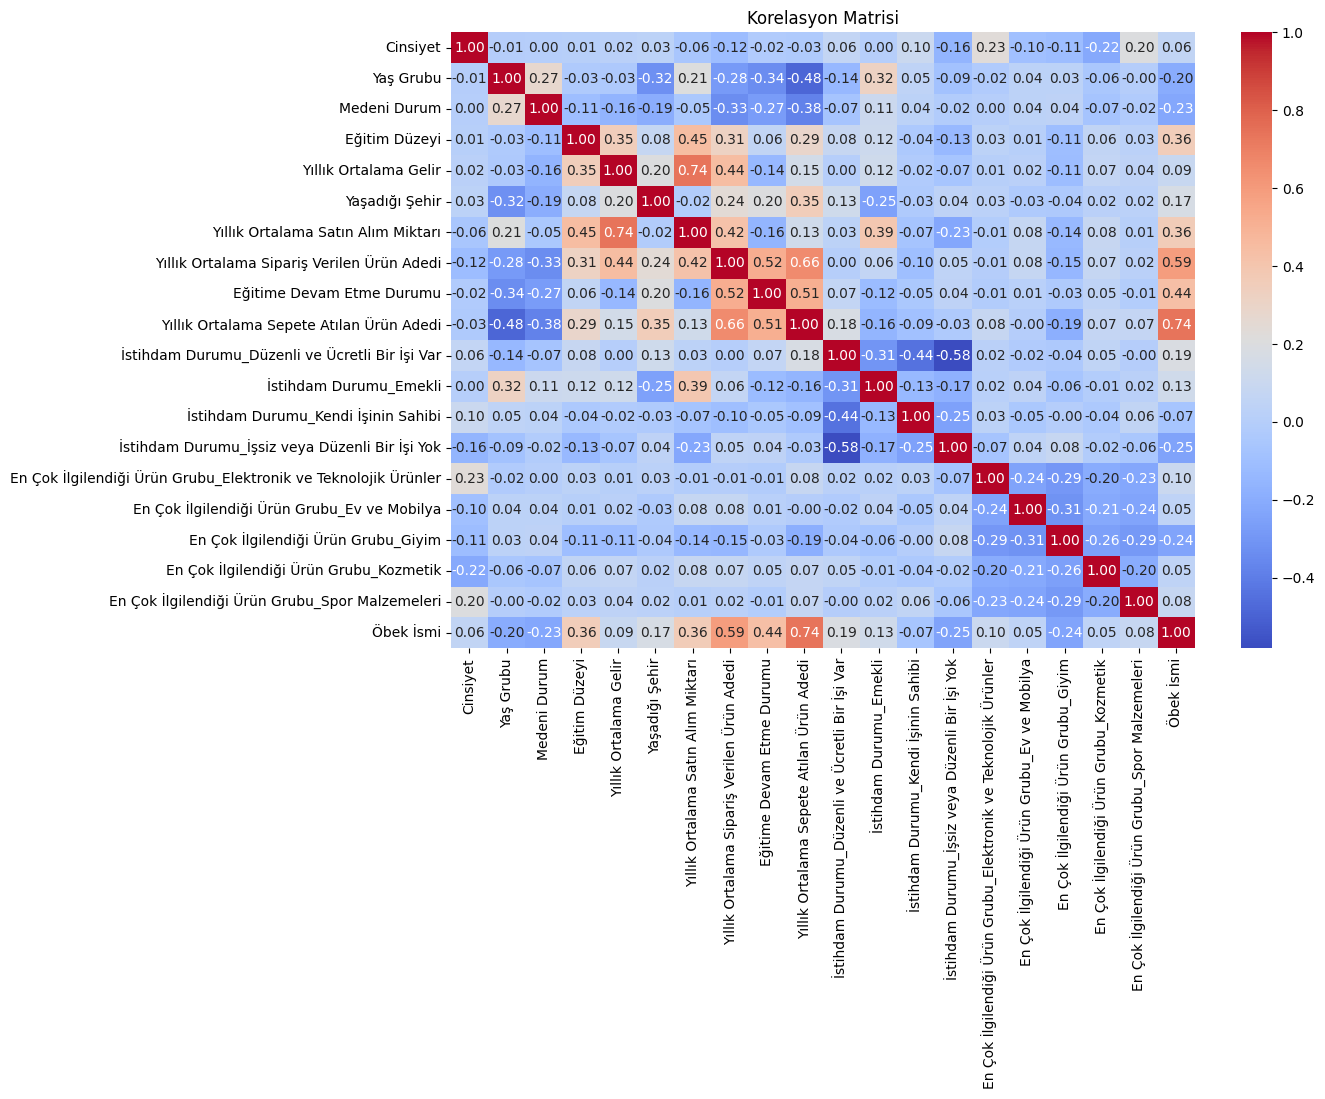

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

### Gözlem

- Çok sütun olduğu için yorum yapmak zor ama lacivert, turuncu ve kırmızı(?) indislere baktığımızda onların değişkenlerinin birbirlerini etkilediğini söyleyebiliriz.
- Ortalama satın alım miktarını eğitim durumu 0.45 etkilemiş gelir ise 0.74 etkilemiş yani burdan eğitim düzeyi yüksek olanların daha fazla gelire sahip olduğunu ve daha fazla satın alım yaptıkları bilgisini çıkarabiliriz
- Sepete atılan ürün ve yaşın ise -0.48 değerine sahip olduğunu görüyoruz, buradan yaşlıların alışveriş yaparken sepete atma yani interneti pek kullanmadığını görürüz
- Bariz olarak sepete atılan ürün ve sipariş edilen ürünün oranının yüksek çıkması gerekir, beklendiği gibi 0.66 çıktı
- Emeklilik ve satın alım miktarı oranının da 0.39 olduğunu görüyoruz, bizim veri setimizdeki emekliler biraz zengin emekli olduğu için alışveriş oranları daha fazla
- Genel olarak bu yorumları yapabiliriz

# Train Test Split

In [37]:
# Veri setimizdeki test verisinin çıktıları belli olmadığı için test yapmak amacıyla train verilerimizi bölebiliriz
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Model Seçimi

In [38]:
# XGBoost, hedef değişkeni sayısal olarak istediği için hedef değişkenimizi sayısal hale getiririz
class_mapping = {
    'obek_1': 0,
    'obek_2': 1,
    'obek_3': 2,
    'obek_4': 3,
    'obek_5': 4,
    'obek_6': 5,
    'obek_7': 6,
    'obek_8': 7
}
Y_train_numeric = Y_train.map(class_mapping)
Y_test_numeric = Y_test.map(class_mapping)

LDA: 0.942083 (0.013756)
KNN: 0.844782 (0.017649)
CART: 0.895144 (0.016766)
NB: 0.940940 (0.012505)
SVM: 0.678810 (0.026609)
XGB: 0.952157 (0.013150)


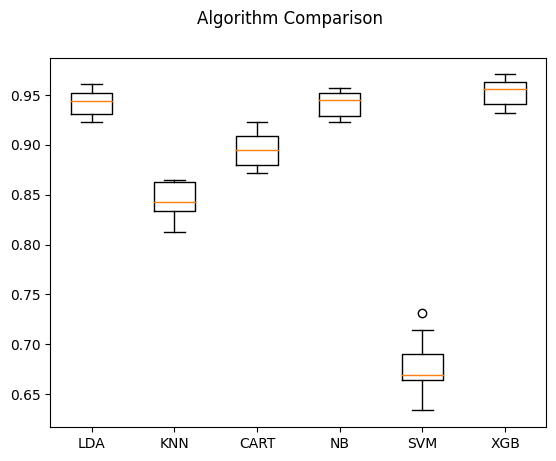

In [39]:
# Farklı algoritmaların kütüphanelerinin import edilmesi
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', xgb.XGBClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train_numeric, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# XGBoost ile Model Eğitimi

In [40]:
# XGBoost algoritmasında karar kılındığı için import edilir
import xgboost as xgb

In [41]:
# Modelin tanımlanması
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [42]:
# Modelin eğitimi için fit fonksiyonuna x ve y değişkenlerimizi veririz
model.fit(X_train, Y_train_numeric)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

# Hiperparametrelerin doğru seçimi için Grid Search kullanalım

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
model2 = xgb.XGBClassifier(random_state=42)

# Grid Search için parametrelerin oluşturulması
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Grid Search nesnesinin oluşturulması
grid_search = GridSearchCV(model2, param_grid, cv=3, scoring='accuracy', verbose=2)

# Grid Search ile modelin eğitilmesi
grid_search.fit(X_train, Y_train_numeric)

# En iyi parametreleri ve elde edilen en iyi skoru yazdırma
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

# En iyi modeli elde etme
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=4, n_e

# Modelin Test Edilmesi

In [45]:
# Modelin doğruluk oranına bakmak için test verisiyle tahmin yapalım
y_pred = best_model.predict(X_test)

In [46]:
# Doğru tahmin edilen verilerin toplam veri sayısına oranına bakmak için sklearn'de accuracy_score fonksiyonu kullanalım
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test_numeric, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9606227106227107


0.96062 gibi yüksek bir accuracy oranımız var. Fakat modelimizde overfitting olmuş mu ona bakmalıyız.

In [47]:
# Eğitim verileri üzerinde tahmin yapalım
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(Y_train_numeric, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Test verileri üzerinde tahmin yapalım
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test_numeric, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Aşırı öğrenme oranını değerlendirelim
overfitting_ratio = train_accuracy - test_accuracy
print("Overfitting Oranı:", overfitting_ratio)

Train Accuracy: 0.9567307692307693
Test Accuracy: 0.9606227106227107
Overfitting Oranı: -0.003891941391941378


Eğer train accuracy, test accuracy'den gözle görülecek şekilde büyük olsaydı overfitting var diyebilirdik. Buna dayanarak train_accuracy-test_accuracy yapınca çıkan sonuç pozitif ve büyük bir değer olsaydı overfitting var diyebilirdik fakat bunun tam aksine negatif bir sonuç elde ettik. Bu sebeple modelimiz overfitting sıkıntısı yaşamamış diyebiliriz.

# Final Modelin Kullanılması

In [50]:
# Modelimizde karar kıldık, submission dosyası oluşturmak için kaggle'da bize verilen test setini kullanalım
tahmin_sonuclari = best_model.predict(test_verisi)

In [51]:
tahmin_sonuclari
# Çıktılar sayısal değer olacak, bu sebeple daha önce yaptığımız class_mapping işlemini tersine çevirmeliyiz

array([2, 2, 1, ..., 6, 4, 5], dtype=int64)

In [52]:
# class_mapping işlemini tersten yapalım
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Tahmin sonuçlarındaki sayısal değerleri obek değerlerine çevirelim
tahmin_sonuclari_obek = [reverse_class_mapping[prediction] for prediction in tahmin_sonuclari]

# Elde edilen tahmin sonuçlarını görüntüleyelim
tahmin_sonuclari_obek

['obek_3',
 'obek_3',
 'obek_2',
 'obek_6',
 'obek_1',
 'obek_2',
 'obek_1',
 'obek_8',
 'obek_7',
 'obek_8',
 'obek_6',
 'obek_7',
 'obek_8',
 'obek_4',
 'obek_4',
 'obek_8',
 'obek_7',
 'obek_8',
 'obek_4',
 'obek_7',
 'obek_8',
 'obek_1',
 'obek_7',
 'obek_7',
 'obek_4',
 'obek_6',
 'obek_8',
 'obek_6',
 'obek_8',
 'obek_1',
 'obek_2',
 'obek_1',
 'obek_8',
 'obek_5',
 'obek_1',
 'obek_3',
 'obek_7',
 'obek_1',
 'obek_7',
 'obek_6',
 'obek_2',
 'obek_2',
 'obek_8',
 'obek_1',
 'obek_5',
 'obek_4',
 'obek_6',
 'obek_7',
 'obek_3',
 'obek_4',
 'obek_6',
 'obek_4',
 'obek_3',
 'obek_2',
 'obek_2',
 'obek_1',
 'obek_1',
 'obek_5',
 'obek_7',
 'obek_7',
 'obek_7',
 'obek_7',
 'obek_6',
 'obek_5',
 'obek_4',
 'obek_3',
 'obek_4',
 'obek_6',
 'obek_3',
 'obek_7',
 'obek_4',
 'obek_6',
 'obek_5',
 'obek_2',
 'obek_1',
 'obek_5',
 'obek_4',
 'obek_2',
 'obek_2',
 'obek_8',
 'obek_3',
 'obek_3',
 'obek_4',
 'obek_5',
 'obek_1',
 'obek_3',
 'obek_5',
 'obek_5',
 'obek_7',
 'obek_6',
 'obek_4',

In [53]:
# Tahmin sonuçlarımız istediğimiz formata geldi, şimdi boyutuna bakalım
len(tahmin_sonuclari_obek)

2340

In [54]:
# Submission dosyası yapmak için uygun formatta dataframe oluşturalım
veri = {
    'id': range(2340),
    'Öbek İsmi': tahmin_sonuclari_obek
}
Tahmin_Dataframe = pd.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)
Tahmin_Dataframe

,Öbek İsmi
id,
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1
...,...
2335,obek_8
2336,obek_2
2337,obek_7


In [55]:
# Oluşturulan Dataframe'i csv formatında bir dosyaya aktaralım
Tahmin_Dataframe.to_csv('submission.csv')

# Son Analizler

In [56]:
df = pd.read_csv('train.csv')

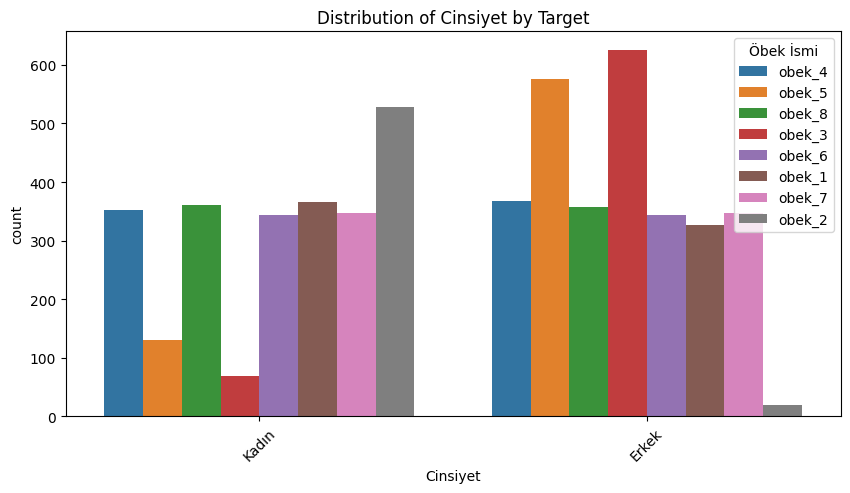

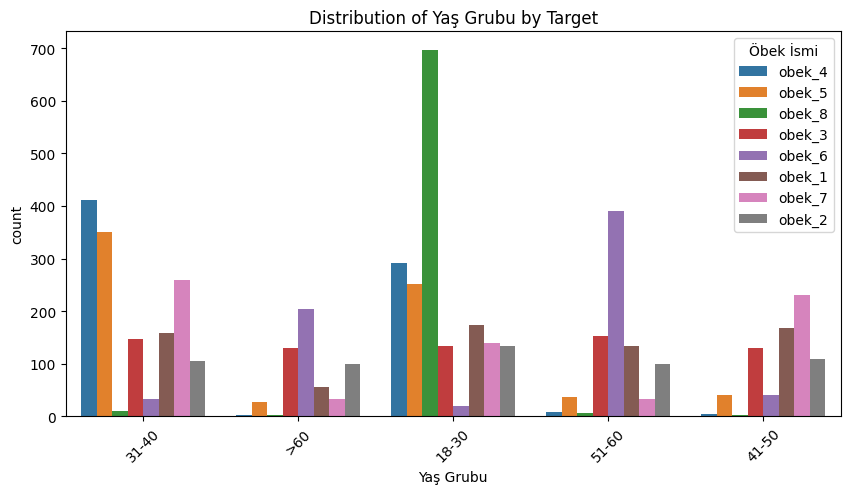

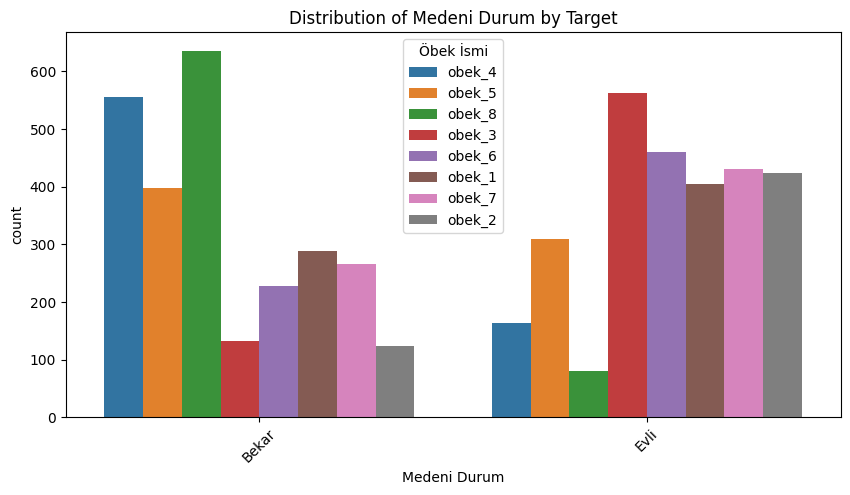

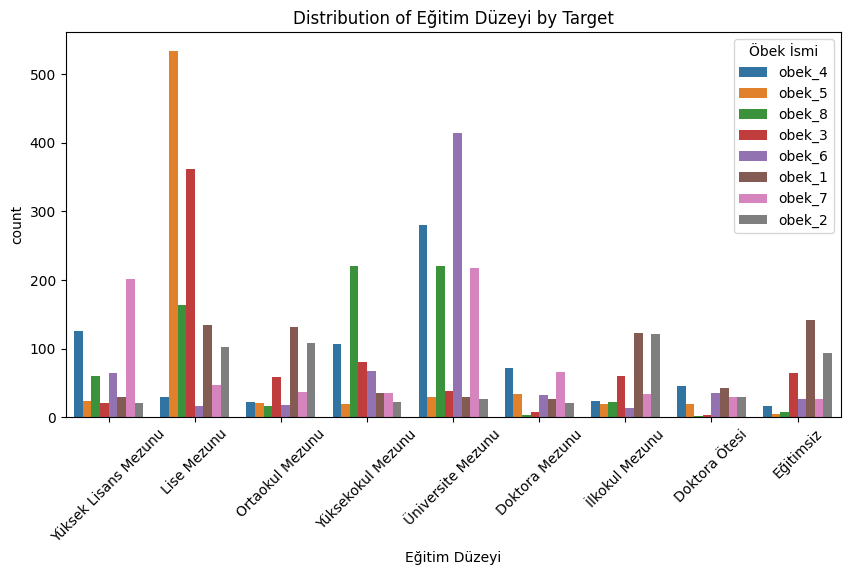

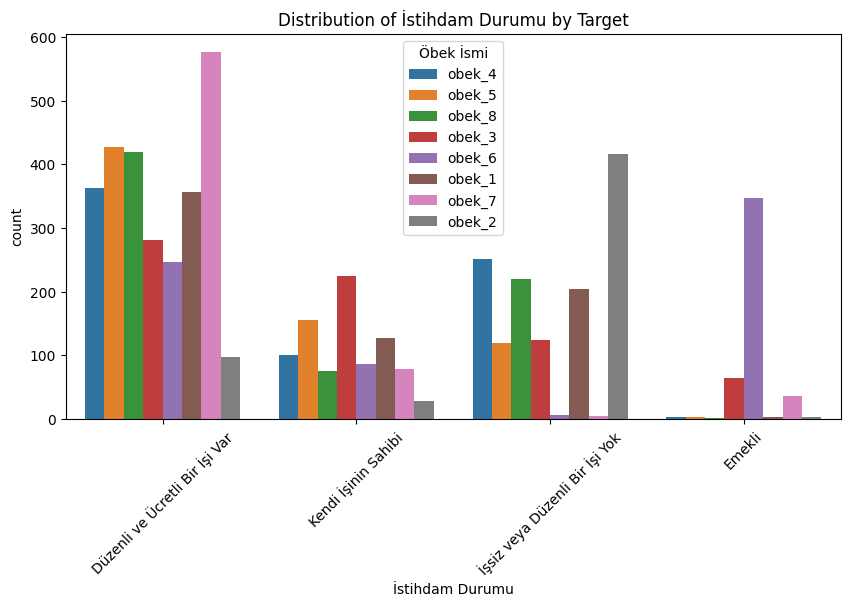

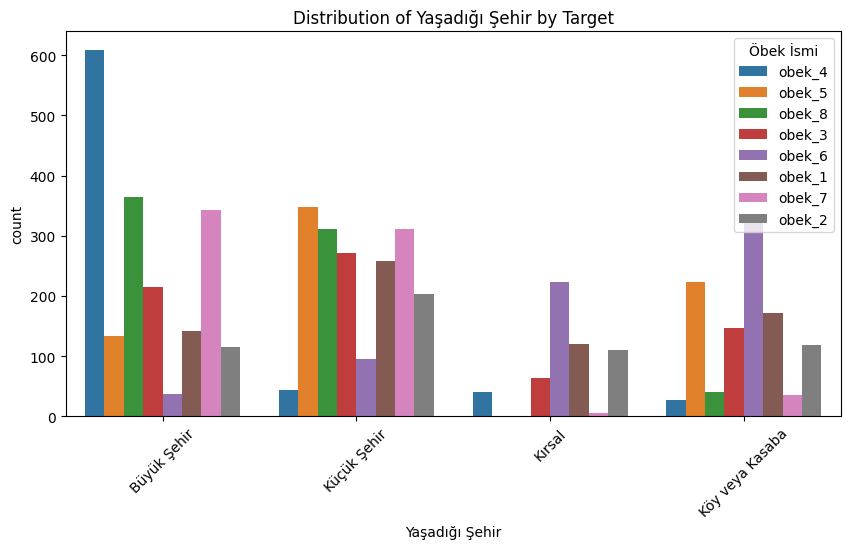

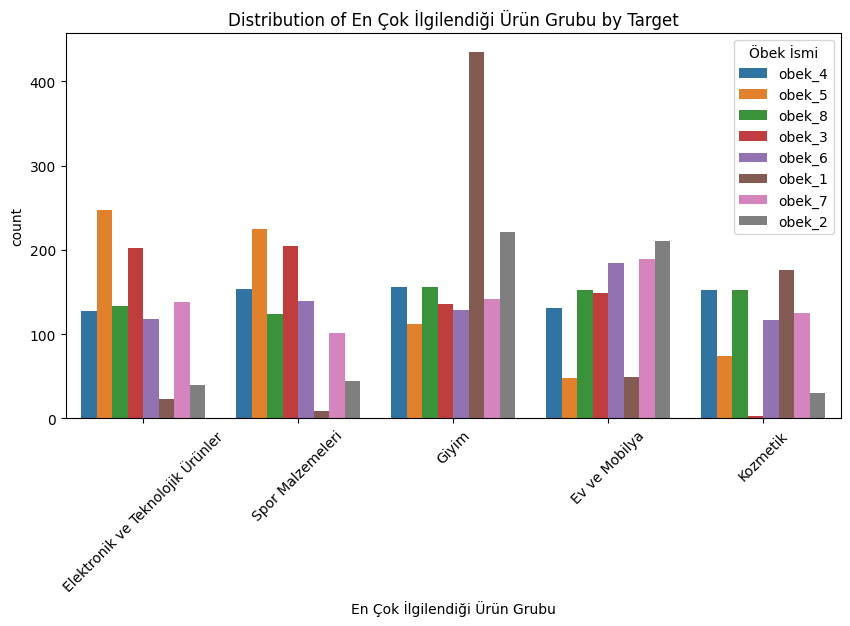

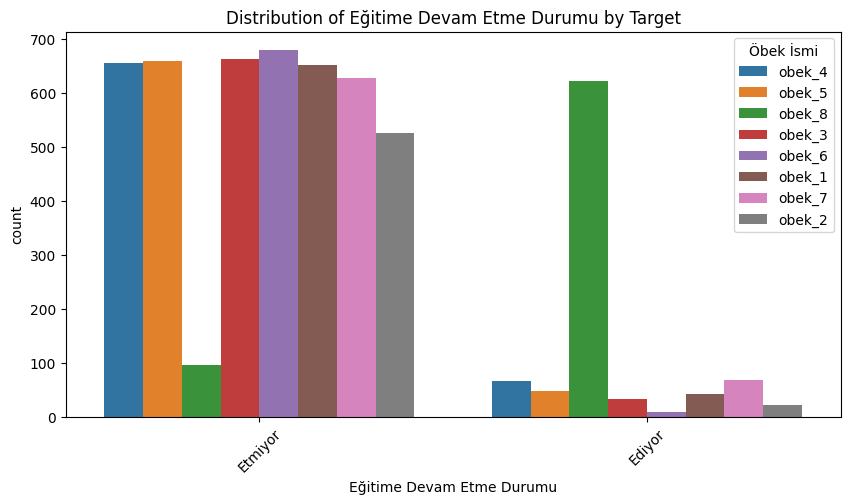

In [57]:
categorical_features = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df, hue='Öbek İsmi')
    plt.title(f'Distribution of {feature} by Target')
    plt.xticks(rotation=45)
    plt.show()

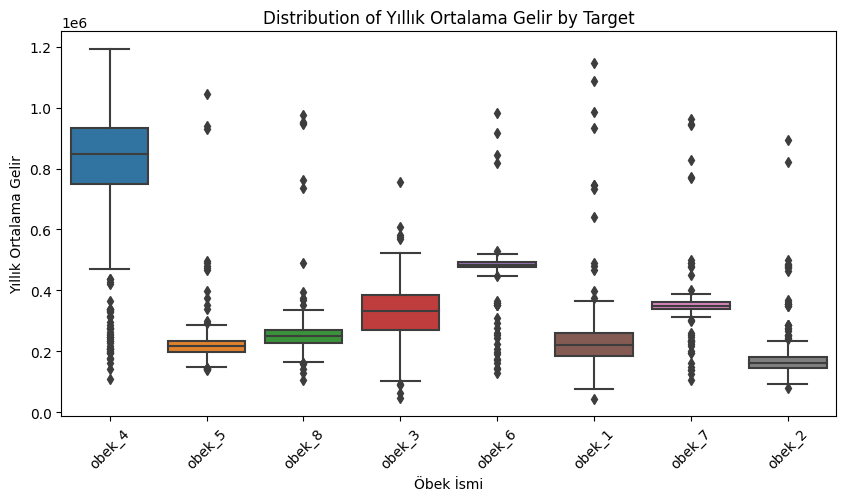

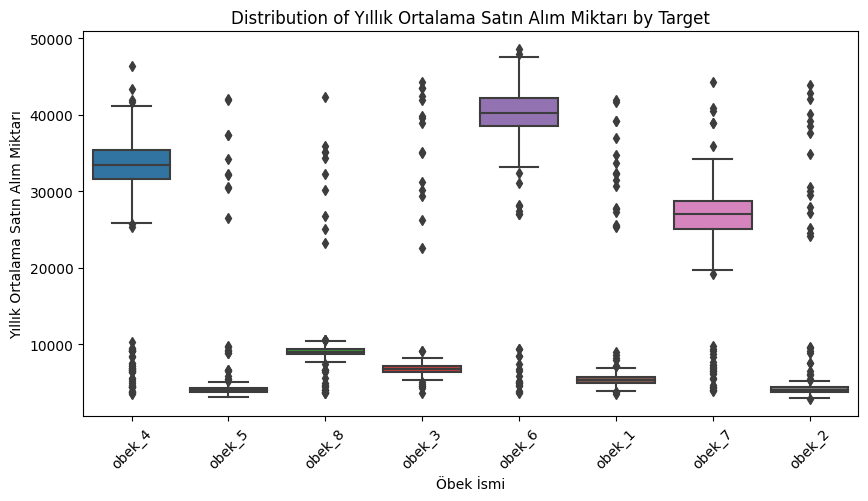

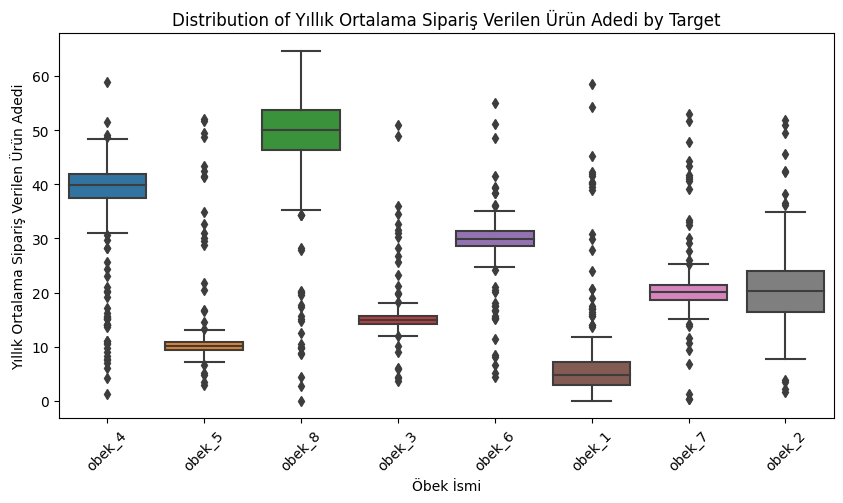

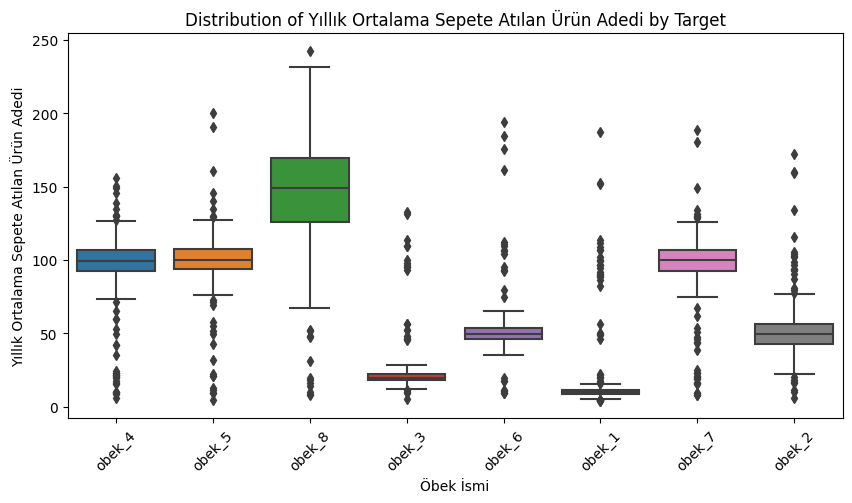

In [58]:
numerical_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Öbek İsmi', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Target')
    plt.xticks(rotation=45)
    plt.show()

#### Öbek 4:

- Cinsiyet: Kadın-Erkek oranı eşit
- Yaş: 18-40 yaş arasındalar
- Medeni Durum: Genellikle bekarlar
- Eğitim Durumu: Genelde Lisans mezunu, bunun hemen peşinden oranı büyük olan yüksek lisans mezunu var
- İstihdam Durumu: Genelde düzenli işleri ve ücretleri var, bir kısmı işsiz veya düzenli bir işi yok
- Yaşadığı Şehir: Büyük çoğunluk büyük şehirlerden
- En Çok İlgilendiği Ürün Durumu: Her ürüne eşit oranda ilgi duymuşlar
- Eğitime Devam Etme Durumu: Büyük çoğunluğu etmiyor
- Yıllık Ortalama Gelir: Geliri en fazla olan grup
- Yıllık Ortalama Satın Alım Miktarı: En büyüğe yakın olarak 2. sırada yer alıyorlar
- Yıllık Ortalama Sipariş Verilen Ürün Adedi: En büyüğe yakın olarak 2. sırada yer alıyorlar
- Yıllık Ortalama Sepete Atılan Ürün Adedi: Ortalamanın üstünde

Öbek 4 Son yorum: Mühendis, doktor tarzı yüksek gelirli okumuş insanlar (Yüksek Gelirliler)

#### Öbek 5:
- Cinsiyet: Erkek oranı daha fazla
- Yaş: 18-40 yaş arasındalar
- Medeni Durum: Bekar daha fazla fakat evli miktarı da az değil
- Eğitim Durumu: Çoğu lise mezunu
- İstihdam Durumu: Çoğunun düzenli ve ücretli işi var
- Yaşadığı Şehir: Çoğunluk küçük şehir ve köy veya kasaba'da bulunuyor
- En Çok İlgilendiği Ürün Durumu: Elektronik teknolojik ürünlere ve spor ürünleri daha çok ilgi gösteriyorlar
- Eğitime Devam Etme Durumu: Devam etmiyorlar
- Yıllık Ortalama Gelir: Ortalama gelirleri en düşük gruplardan
- Yıllık Ortalama Satın Alım Miktarı: Satın alım miktarı en düşük grup
- Yıllık Ortalama Sipariş Verilen Ürün Adedi: Sipariş verilen ürün az
- Yıllık Ortalama Sepete Atılan Ürün Adedi: Ortalamanın üstünde

Öbek 5 Son yorum: Asgari ücret veya bir miktar daha fazla maaşla çalışan insanlar (Mavi Yakalılar)

#### Öbek 8:
- Cinsiyet: Erkek-Kadın oranı aynı
- Yaş: 18-30 yaşında
- Medeni Durum: Bekar
- Eğitim Durumu: Lise, yüksekokul ve lisans mezunu
- İstihdam Durumu: Düzenli ve ücretli işi var, yadsınamayacak kadar da işsiz veya düzenli işi olmayan var
- Yaşadığı Şehir: Büyük şehir ve küçük şehirde yaşıyorlar
- En Çok İlgilendiği Ürün Durumu: Her ürüne ilgililer
- Eğitime Devam Etme Durumu: Eğitimleri devam ediyor
- Yıllık Ortalama Gelir: Gelirleri çok düşük
- Yıllık Ortalama Satın Alım Miktarı: Düşük
- Yıllık Ortalama Sipariş Verilen Ürün Adedi: En çok sipariş veren grup
- Yıllık Ortalama Sepete Atılan Ürün Adedi: Sepete en çok ürün alan grup

Öbek 8 Son yorum: Öğrenciler veya Yeni Mezunlar

#### Öbek 3:
- Cinsiyet: Erkek
- Yaş: Her yaş grubu
- Medeni Durum: Çoğunluk evli
- Eğitim Durumu: Çoğunluk lise mezunu
- İstihdam Durumu: Çoğunluk düzenli ve ücretli bir işi var veya kendi işinin sahibi
- Yaşadığı Şehir: Kırsal ve köy veya kasaba daha az olmakla birlikte her bölgede yaşıyorlar
- En Çok İlgilendiği Ürün Durumu: Kozmetik hariç her ürüne ilgililer
- Eğitime Devam Etme Durumu: Eğitime devam etmiyorlar
- Yıllık Ortalama Gelir: Ortalama
- Yıllık Ortalama Satın Alım Miktarı: Düşük
- Yıllık Ortalama Sipariş Verilen Ürün Adedi: Düşük
- Yıllık Ortalama Sepete Atılan Ürün Adedi: Düşük

Öbek 3 Son yorum: Erkek Memur Grubu (Evin Reisi)

#### Öbek 6:
- Cinsiyet: Oran eşit
- Yaş: 50 yaşından büyük
- Medeni Durum: Genelde evli
- Eğitim Durumu: Çoğu lisans mezunu
- İstihdam Durumu: Çoğu emekli, yadsınamayacak kadar da düzenli ve ücretli işte çalışan var
- Yaşadığı Şehir: Çoğu kırsal ve köy veya kasabada
- En Çok İlgilendiği Ürün Durumu: Her ürüne ilgililer
- Eğitime Devam Etme Durumu: Etmiyor
- Yıllık Ortalama Gelir: Gelirleri ortalamanın üstünde, 2. sıradaki grup
- Yıllık Ortalama Satın Alım Miktarı: En fazla satın alım yapan grup
- Yıllık Ortalama Sipariş Verilen Ürün Adedi: Fazla fakat gruplar arasında 3.
- Yıllık Ortalama Sepete Atılan Ürün Adedi: Az

Öbek 6 Son yorum: Zengin Emekliler

#### Öbek 1:
- Cinsiyet: Eşit
- Yaş: Her yaş grubu
- Medeni Durum: Çoğunluk evli fakat bekar da çok (66 33 gibi)
- Eğitim Durumu: Lise, ortaokul, ilkokul, eğitimsiz oranları fazla
- İstihdam Durumu: Düzenli işi olan çok var, işi olmayan da az değil
- Yaşadığı Şehir: Çoğunluk küçük şehirde, diğer yerlerde oran aynı
- En Çok İlgilendiği Ürün Durumu: Giyime çok fazla para harcıyorlar, ev ve mobilyaya da çokça para harcıyorlar
- Eğitime Devam Etme Durumu: Etmiyorlar
- Yıllık Ortalama Gelir: Düşük
- Yıllık Ortalama Satın Alım Miktarı: Düşük
- Yıllık Ortalama Sipariş Verilen Ürün Adedi: Düşük
- Yıllık Ortalama Sepete Atılan Ürün Adedi: Düşük

Öbek 1 Son yorum: Asgari ücret gibi ücretlerde çalışan okumamış insanlar (Dar Gelirliler)

#### Öbek 7:
- Cinsiyet: Eşit
- Yaş: 31-50 yaş fazla
- Medeni Durum: Çoğu evli ama bekar da çok(66 33 gibi)
- Eğitim Durumu: Çoğu lisans ve yüksek lisans mezunu
- İstihdam Durumu: Düzenli ve ücretli işi var
- Yaşadığı Şehir: Büyük şehir ve küçük şehir
- En Çok İlgilendiği Ürün Durumu: Her ürüne ilgililer
- Eğitime Devam Etme Durumu: Etmiyor
- Yıllık Ortalama Gelir: Ortalama üstü
- Yıllık Ortalama Satın Alım Miktarı: Fazla
- Yıllık Ortalama Sipariş Verilen Ürün Adedi: Ortalama üstü
- Yıllık Ortalama Sepete Atılan Ürün Adedi: Ortalama üstü

Öbek 7 Son yorum: Beyaz Yakalılar

#### Öbek 2:
- Cinsiyet: Kadın
- Yaş: Her yaştan var
- Medeni Durum: Genelde evli
- Eğitim Durumu: Lise, ortaokul, ilkokul, eğitimsiz
- İstihdam Durumu: İşsiz
- Yaşadığı Şehir: Her şehirde var ama en çok küçük şehirde
- En Çok İlgilendiği Ürün Durumu: Ev mobilya ve giyimle çok ilgileniyorlar
- Eğitime Devam Etme Durumu: Etmiyor
- Yıllık Ortalama Gelir: En düşük
- Yıllık Ortalama Satın Alım Miktarı: Düşük
- Yıllık Ortalama Sipariş Verilen Ürün Adedi: Ortalama
- Yıllık Ortalama Sepete Atılan Ürün Adedi: Ortalama

Öbek 2 Son yorum: Ev hanımı